# IMPORTING THE MODULES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

# DATASET

In [2]:
dataset = pd.read_csv("housing1.csv")

In [3]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
#dataset.replace({'yes':1,'no':0,'furnished':1,'semi-furnished':0.5,'unfurnished':0}, inplace=True)
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
dataset.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [6]:
dataset.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


# ANALYSIS

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'parking'}>]], dtype=object)

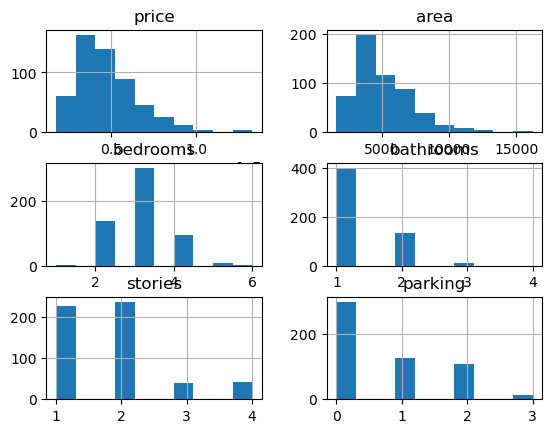

In [8]:
dataset.hist()

<Axes: >

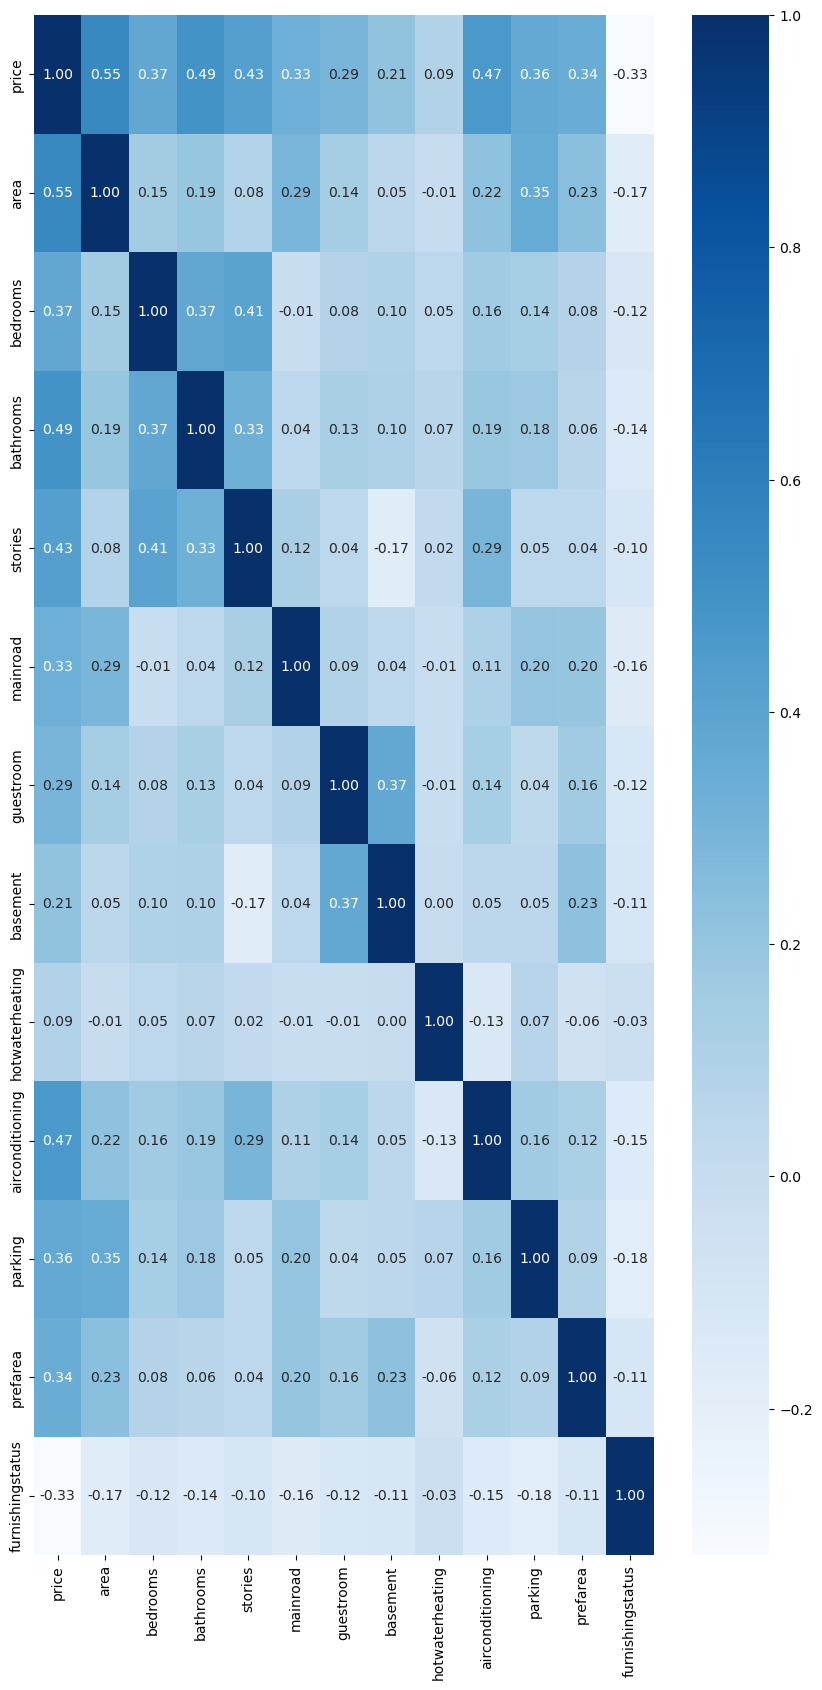

In [43]:
corr = dataset.corr()
fig, ax = plt.subplots(figsize=(10,20))
sns.heatmap(corr,annot=True,ax=ax,cmap = 'Blues', fmt = '.2f')

In [11]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))
 
int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))
 
fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 7
Integer variables: 0
Float variables: 0


<Axes: title={'center': 'No. Unique values of Categorical Features'}>

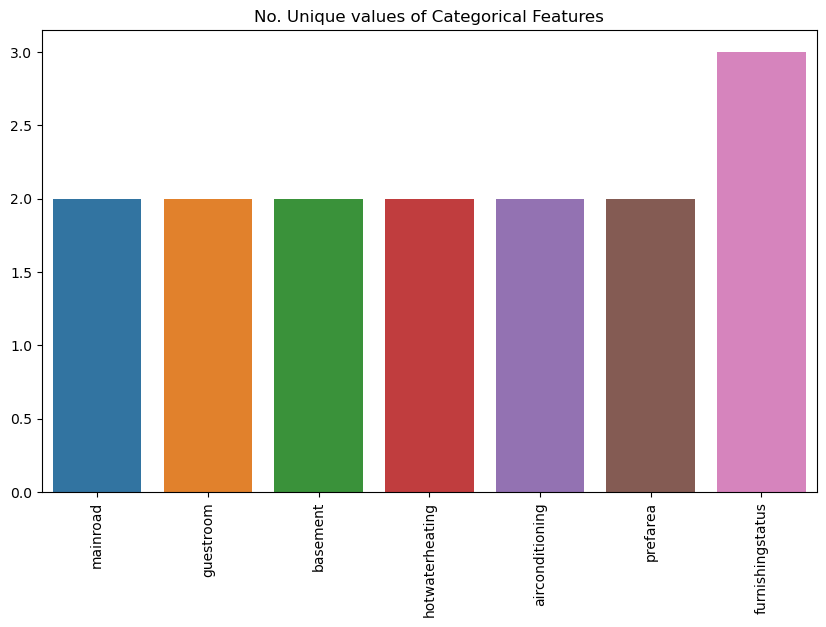

In [12]:
unique_values = []
for col in object_cols:
  unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

C:\Users\Hp\AppData\Local\Temp\ipykernel_14672\3105599954.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(11, 2, index)


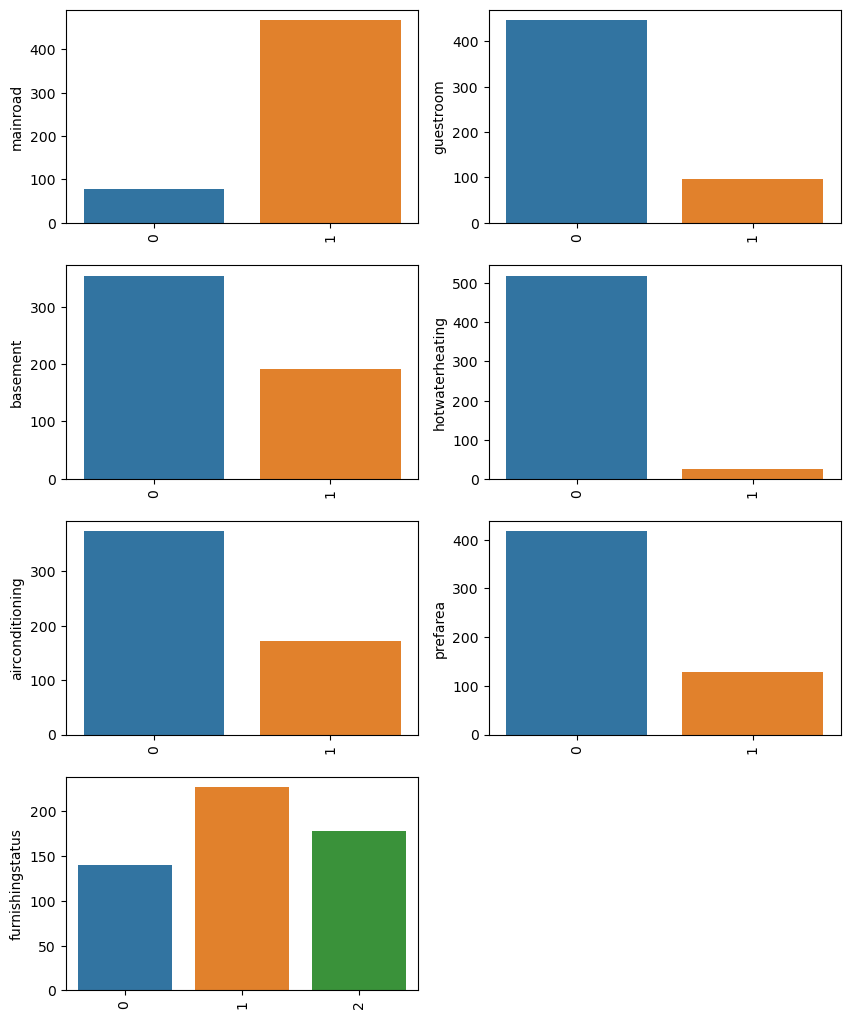

In [42]:
plt.figure(figsize=(10, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1
 
for col in object_cols:
    y = dataset[col].value_counts()
    plt.subplot(11, 2, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

In [38]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [15]:
dataset["price"] = le.fit_transform(dataset["price"])
dataset.replace({'yes':1,'no':0})
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,218,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,217,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,217,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,216,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,215,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [16]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,218,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,217,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,217,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,216,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,215,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [17]:
print(dataset['mainroad'].unique())
print(dataset['guestroom'].unique())
print(dataset['basement'].unique())
print(dataset['hotwaterheating'].unique())
print(dataset['airconditioning'].unique())
print(dataset['prefarea'].unique())
print(dataset['furnishingstatus'].unique())

['yes' 'no']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['yes' 'no']
['yes' 'no']
['furnished' 'semi-furnished' 'unfurnished']


In [18]:
dataset['mainroad'].value_counts()
dataset['guestroom'].value_counts()
dataset['basement'].value_counts()
dataset['hotwaterheating'].value_counts()
dataset['airconditioning'].value_counts()
dataset['prefarea'].value_counts()
dataset['furnishingstatus'].value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [19]:
one_hot_encoded_data = pd.get_dummies(dataset, columns = ['mainroad', 'guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus'])
print(one_hot_encoded_data)

     price  area  bedrooms  bathrooms  stories  parking  mainroad_no  \
0      218  7420         4          2        3        2            0   
1      217  8960         4          4        4        3            0   
2      217  9960         3          2        2        2            0   
3      216  7500         4          2        2        3            0   
4      215  7420         4          1        2        2            0   
..     ...   ...       ...        ...      ...      ...          ...   
540      2  3000         2          1        1        2            0   
541      1  2400         3          1        1        0            1   
542      0  3620         2          1        1        0            0   
543      0  2910         3          1        1        0            1   
544      0  3850         3          1        2        0            0   

     mainroad_yes  guestroom_no  guestroom_yes  ...  basement_yes  \
0               1             1              0  ...             0 

In [20]:
#pd.merge([dataset,one_hot_encoded_data],axis=1)'mainroad', 'guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['mainroad'] = le.fit_transform(dataset['mainroad'])
dataset['guestroom'] = le.fit_transform(dataset['guestroom'])
dataset['basement'] = le.fit_transform(dataset['basement'])
dataset['hotwaterheating'] = le.fit_transform(dataset['hotwaterheating'])
dataset['airconditioning'] = le.fit_transform(dataset['airconditioning'])
dataset['prefarea'] = le.fit_transform(dataset['prefarea'])
dataset['furnishingstatus'] = le.fit_transform(dataset['furnishingstatus'])



In [21]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,218,7420,4,2,3,1,0,0,0,1,2,1,0
1,217,8960,4,4,4,1,0,0,0,1,3,0,0
2,217,9960,3,2,2,1,0,1,0,0,2,1,1
3,216,7500,4,2,2,1,0,1,0,1,3,1,0
4,215,7420,4,1,2,1,1,1,0,1,2,0,0


In [22]:
from sklearn.linear_model import LinearRegression
x_train,y_train = dataset.drop(['price'],axis=1),dataset['price']
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [23]:
print("Accuracy: ",model.score(x_train,y_train)*100)

Accuracy:  70.58160472269324


In [26]:
from sklearn.ensemble import RandomForestRegressor
#x_train,y_train = dataset.drop(['price'],axis=1),dataset['price']
#x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.1)
model= RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [27]:
print("Accuracy: ",model.score(x_train,y_train)*100)

Accuracy:  95.44689094797054


In [31]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [32]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [34]:
print("Accuracy: ",model.score(x_train,y_train)*100)

Accuracy:  98.89908256880734
